In [9]:
import pandas as pd
#import pandas_datareader as dr
%matplotlib inline
#import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
facebook_stocks = dr.data.get_data_yahoo('fcb', start = '2018-01-01', end = '2018-12-31')

In [12]:
facebook_stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,51.599998,50.700001,51.250000,51.150002,273281,51.150002
2018-01-03,51.750000,50.549999,51.000000,51.599998,288030,51.599998
2018-01-04,52.450001,51.400002,51.849998,51.700001,147804,51.700001
2018-01-05,52.750000,51.599998,52.049999,52.650002,177793,52.650002
2018-01-08,52.450001,51.599998,52.299999,52.000000,183236,52.000000
...,...,...,...,...,...,...
2018-12-24,32.740002,31.820000,32.189999,31.830000,496744,31.830000
2018-12-26,33.529999,31.520000,31.920000,33.490002,555249,33.490002
2018-12-27,33.369999,31.969999,32.990002,33.099998,1532803,33.099998


In [13]:
amazon_stocks = dr.data.get_data_yahoo('amzn', start = '2018-01-01', end = '2018-12-31')

In [14]:
amazon_stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...
2018-12-24,1396.030029,1307.000000,1346.000000,1343.959961,7220000,1343.959961
2018-12-26,1473.160034,1363.010010,1368.890015,1470.900024,10411800,1470.900024
2018-12-27,1469.000000,1390.310059,1454.199951,1461.640015,9722000,1461.640015


In [21]:
#amazon_stocks['Adj Close'].plot(figsize = (15,10))
# Computes the percentage change from the immediately previous row by default.
facebook_daily_returns = facebook_stocks['Adj Close'].pct_change()
amazon_daily_returns = amazon_stocks['Adj Close'].pct_change()

In [22]:
facebook_daily_returns

Date
2018-01-02         NaN
2018-01-03    0.008798
2018-01-04    0.001938
2018-01-05    0.018375
2018-01-08   -0.012346
                ...   
2018-12-24   -0.021819
2018-12-26    0.052152
2018-12-27   -0.011645
2018-12-28    0.017523
2018-12-31   -0.002969
Name: Adj Close, Length: 251, dtype: float64

In [23]:
amazon_daily_returns

Date
2018-01-02         NaN
2018-01-03    0.012775
2018-01-04    0.004476
2018-01-05    0.016163
2018-01-08    0.014425
                ...   
2018-12-24   -0.024313
2018-12-26    0.094452
2018-12-27   -0.006295
2018-12-28    0.011207
2018-12-31    0.016204
Name: Adj Close, Length: 251, dtype: float64

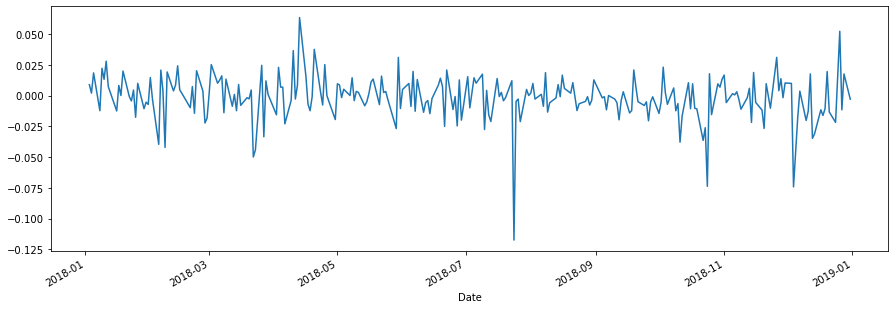

In [24]:
# daily facebook stocks
facebook_daily_returns.plot(figsize = (15,5))

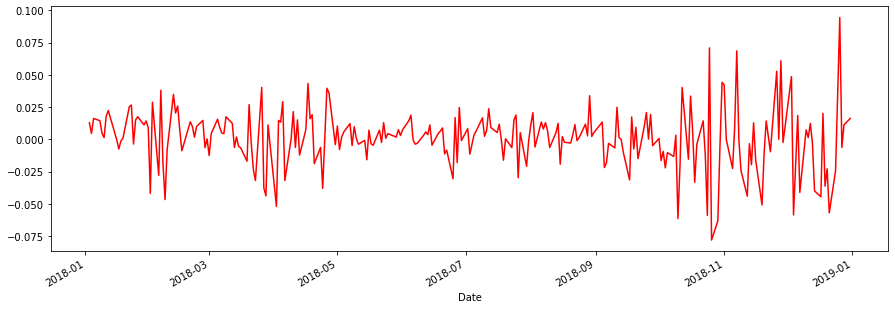

In [25]:
# daily amazon stocks
amazon_daily_returns.plot(figsize = (15,5), color = 'red')

In [30]:
tickers_list = ['fcb', 'amzn']
facebook_amazon_stocks = yf.download(tickers_list,'2018-1-1', '2019-1-1')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [31]:
facebook_amazon_stocks

,AMZN,FCB
Date,,
2018-01-02,1189.010010,51.150002
2018-01-03,1204.199951,51.599998
2018-01-04,1209.589966,51.700001
2018-01-05,1229.140015,52.650002
2018-01-08,1246.869995,52.000000
...,...,...
2018-12-24,1343.959961,31.830000
2018-12-26,1470.900024,33.490002
2018-12-27,1461.640015,33.099998


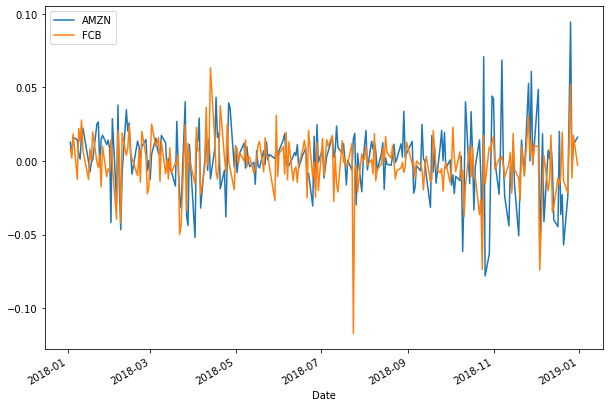

In [36]:
# Plot all the close prices
(facebook_amazon_stocks.pct_change()).plot(figsize=(10, 7))

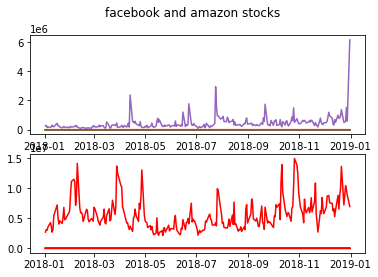

In [40]:
fig, axs = plt.subplots(2)
fig.suptitle('facebook and amazon stocks')
axs[0].plot(facebook_stocks)
axs[1].plot(amazon_stocks, color = 'red')

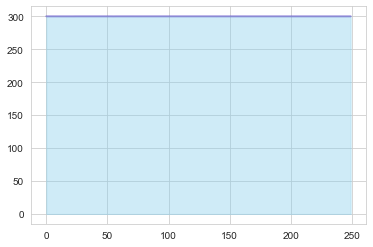

In [96]:

# !!!!!!!!!!!!!!!!!!!!!!!
# something not right here
my_facebook_stock = 300
my_amazon_stock   = 700

facebook_holding_temp = np.array([])
for f_stock in facebook_daily_returns:
    facebook_holding_temp = np.append(facebook_holding_temp, f_stock * my_facebook_stock * 100)

amazon_holding_temp = np.array([])
for f_stock in amazon_daily_returns:
    amazon_holding_temp = np.append(amazon_holding_temp, f_stock  * my_amazon_stock * 100)
    
#facebook_holding = np.delete(facebook_holding_temp, 0)  
#amazon_holding   = np.delete(amazon_holding_temp, 0)
#fcb_range  = facebook_holding.max() - facebook_holding.min()
#amzn_range = amazon_holding.max()   - amazon_holding.min() 
#
#sns.set_style("whitegrid")
## Color palette
#blue, = sns.color_palette("muted", 1)
## Create data
#x1 = np.arange(0, facebook_holding.size)
#x2 = np.arange(0, amazon_holding.size)
#
## Make the plot
#fig, axs = plt.subplots(2)
#axs[0].plot(x1, facebook_holding, color=blue, lw=3)
#axs[0].fill_between(x1, facebook_holding, alpha=.3)
##axs[0].set(xlim=(0, len(x1) - 1), ylim=(0, None), xticks=x1)
#
##axs[1].plot(x2, amazon_holding, color=blue, lw=3)
##axs[1].fill_between(x2, 0, amazon_holding, alpha=.3)
##axs[1].set(xlim=(0, len(x2) - 1), ylim=(0, None), xticks=x2)

plt.fill_between(np.arange(facebook_holding.size), facebook_holding,
                 color="skyblue", alpha=0.4)
plt.plot(np.arange(facebook_holding.size), facebook_holding, color="Slateblue",
         alpha=0.6, linewidth=2)

plt.show()
